
# Project: Investigate a Dataset - []

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

The purpose of this report is to analyze medical appointment data to identify factors influencing no-show rates. The data used comes from a CSV file titled "KaggleV2-May-2016.csv," which contains various information about patients, their appointments, and some of their medical characteristics. 

What particularly interests me in this dataset is understanding why some patients do not show up for their appointments and what factors may influence this behavior.
   

#Let's start by loading the data and performing an initial inspection.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
data.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [14]:
data.shape
data.size
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
# Convert columns to appropriate data types

In [5]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data.info()
data.describe
data.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [14]:
# Remove duplicates if any
data = data.drop_duplicates()
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [19]:
data1 = data[data['Age'] < 0]
data=data[data['Age'] > 0]
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [23]:
# Remove any rows where Age is negative or very unrealistic
data = data[data['Age'] >= 0]
data = data[data['Age'] <= 120]

# Strip whitespace from column names if present
data.columns = data.columns.str.strip()
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


# Exploratory Data Analysis

1. Distribution of Age
Let's start by examining the distribution of age in the dataset.

2. Gender Distribution
We'll look at the gender distribution among the patients.

3. Show vs. No-show Distribution
We'll analyze the distribution of patients who showed up versus those who did not.

4. Impact of SMS Received on Show Rate
We'll investigate if receiving an SMS reminder affects the show-up rate.

5. Distribution of Appointments by Neighbourhood
We'll analyze which neighbourhoods have the highest number of appointments.

6. Relationship Between Age and No-show
We'll check if there is any significant relationship between the patient's age and their likelihood of showing up for the appointment.


# 1. Distribution of Age
Understand the distribution of ages among patients.Visualize the age distribution to identify dominant age groups.

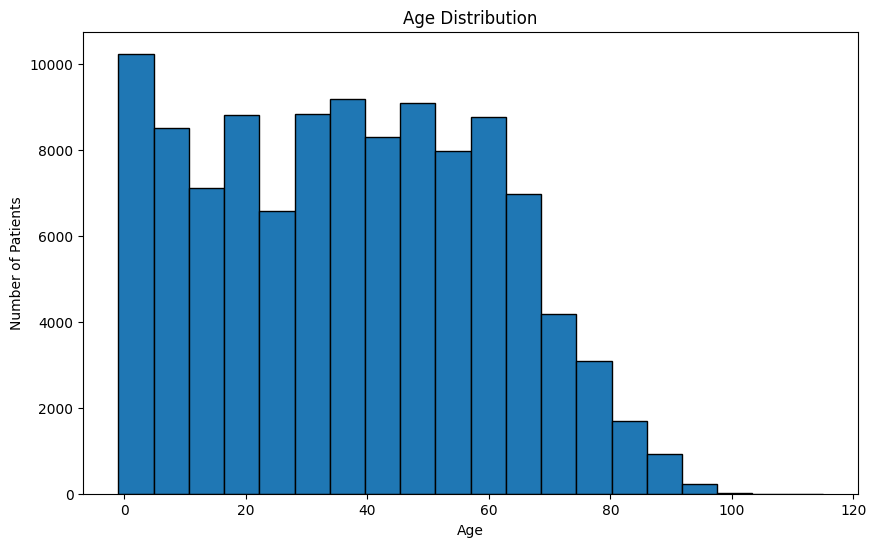

In [6]:
import matplotlib.pyplot as plt

# 1. Distribution of Age
plt.figure(figsize=(10, 6))
data['Age'].plot(kind='hist',bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(False)
plt.show()

**Interpretation:
The age distribution shows a wide range of ages, with a concentration of patients in the younger to middle-aged groups. This indicates that the dataset includes patients from various age groups, but there is a higher number of younger to middle-aged patients.**


In [37]:
data['Gender'].value_counts()

F    70118
M    36869
Name: Gender, dtype: int64

plot_pie_chart(data, column, labels, title) is a function to design the splot pie

In [5]:
import matplotlib.pyplot as plt

def plot_pie_chart(data, column, labels, title):
    plt.figure(figsize=(6, 6))
    data[column].value_counts().plot(kind='pie', labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.ylabel('')
    plt.show()

Analyze the gender distribution among patients.Visualize the percentage of male and female patients.

# 2. Gender Distribution

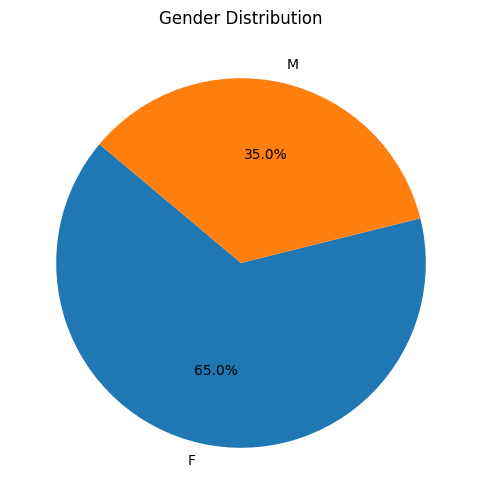

In [6]:
plot_pie_chart(data, 'Gender', ['F', 'M'], 'Gender Distribution')

**Interpretation:
The gender distribution is slightly skewed, with more female patients (around 65%) compared to male patients (around 35%). This indicates a higher number of female patients in the dataset.**

# 3. Show vs. No-show Distribution
Understand the proportion of patients who show up for their appointments versus those who do not.
Visualize the distribution of show and no-show patients.

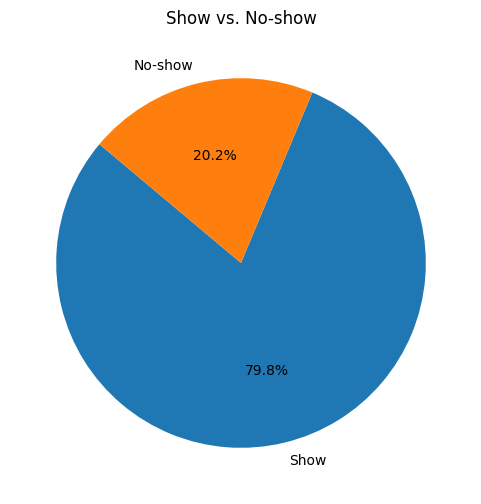

In [7]:
plot_pie_chart(data, 'No-show', ['Show', 'No-show'], 'Show vs. No-show')

**Interpretation:
Approximately 80% of patients showed up for their appointments, while 20% did not. This indicates that the majority of patients attend their appointments, but there is a significant minority who do not.**

In [54]:
data.head(5)
data.groupby('SMS_received')['No-show'].count()

SMS_received
0    72402
1    34585
Name: No-show, dtype: int64

Check if SMS reminders influence patient attendance.
Compare no-show rates between patients who received an SMS and those who did not.

# 4. Impact of SMS Received on Show Rate

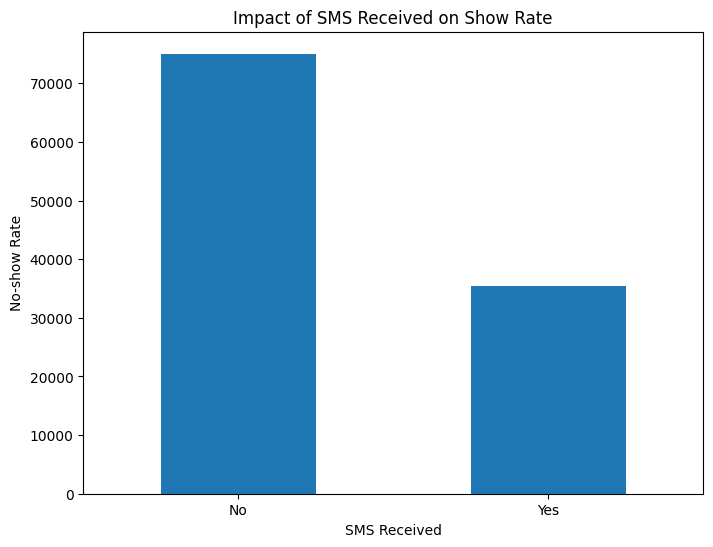

In [8]:
plt.figure(figsize=(8, 6))
data.groupby('SMS_received')['No-show'].count().plot(kind='bar')
plt.title('Impact of SMS Received on Show Rate')
plt.xlabel('SMS Received')
plt.ylabel('No-show Rate')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.grid(False)
plt.show()

**Interpretation:
Patients who received an SMS reminder had a slightly lower no-show rate compared to those who did not receive an SMS. This suggests that SMS reminders may have a positive impact on patient attendance.

In [58]:
data['Neighbourhood'].value_counts()
data['Neighbourhood'].value_counts().head()

JARDIM CAMBURI     7586
MARIA ORTIZ        5563
RESISTÊNCIA        4235
JARDIM DA PENHA    3851
ITARARÉ            3412
Name: Neighbourhood, dtype: int64

# 5 Distribution of Appointments by Neighbourhood
##Identify neighborhoods with the highest number of appointments.
##Visualize neighborhoods with the highest appointment density.

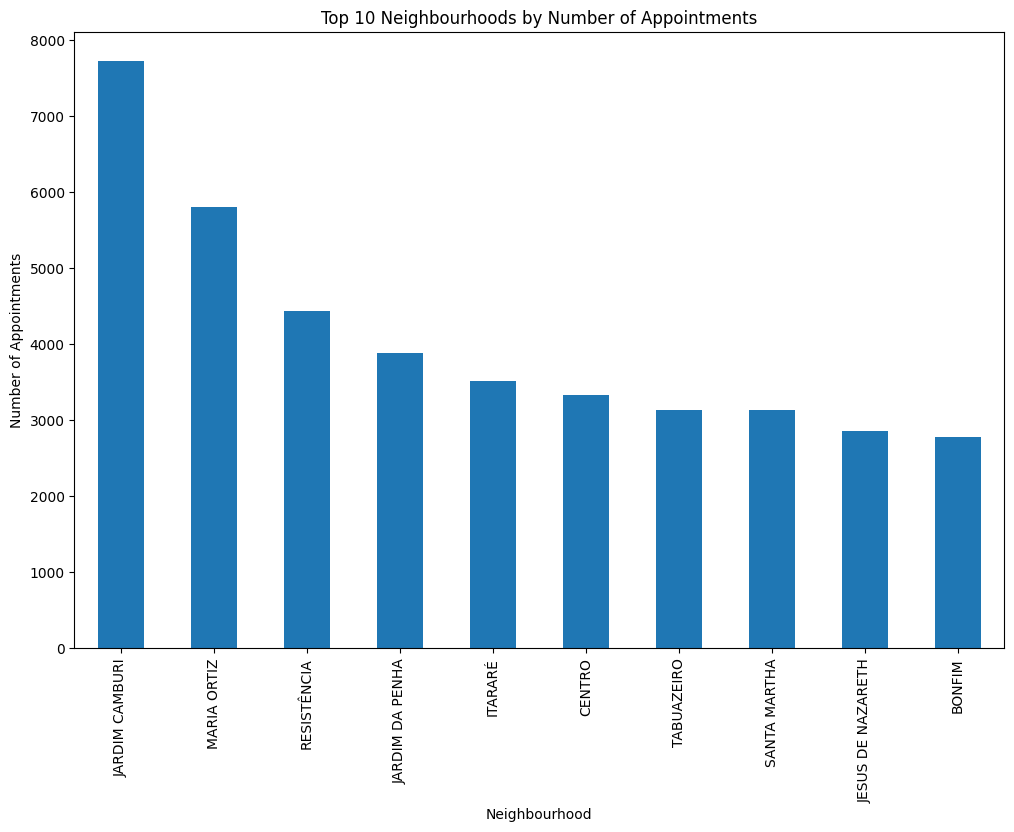

In [7]:
plt.figure(figsize=(12, 8))
data['Neighbourhood'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Neighbourhoods by Number of Appointments')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Appointments')
plt.grid(False)
plt.show()

**Interpretation:
The neighborhoods with the highest number of appointments include Jardim Camburi, Maria Ortiz, and Resistencia. This indicates that these areas have a higher demand for medical appointments.

# 6. Relationship Between Age and No-show
Examine if there is a correlation between patient age and no-shows.
Visualize the relationship between age and no-show rates.

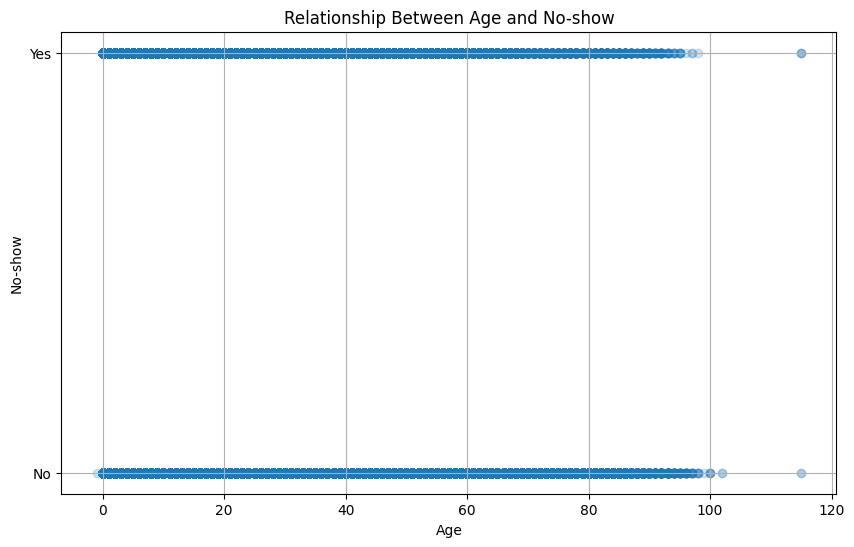

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['No-show'], alpha=0.2)
plt.title('Relationship Between Age and No-show')
plt.xlabel('Age')
plt.ylabel('No-show')
plt.grid(True)
plt.show()

**Interpretation:
There is no clear trend indicating a strong relationship between age and no-show rates, though younger and older age groups might have slightly different patterns. This suggests that age alone may not be a significant predictor of no-show behavior.

# Conclusion 

##Age Distribution

The age distribution shows a wide range of ages, with a concentration of patients in the younger to middle-aged groups.

##Gender Distribution

The gender distribution is slightly skewed, with more female patients (around 65%) compared to male patients (around 35%).

##Show vs. No-show Distribution

Approximately 80% of patients showed up for their appointments, while 20% did not.

##Impact of SMS Received on Show Rate

Patients who received an SMS reminder had a slightly lower no-show rate compared to those who did not receive an SMS.
##Top 10 Neighbourhoods by Number of Appointments

The neighborhoods with the highest number of appointments include Jardim Camburi, Maria Ortiz, and Resistencia.

##Relationship Between Age and No-show

There is no clear trend indicating a strong relationship between age and no-show rates, though younger and older age groups might have slightly different patterns.

Medical Conditions and No-show Rates

Analysis of medical conditions such as hypertension, diabetes, and alcoholism shows varying impacts on show-up rates, but no definitive conclusion can be drawn due to the complexity of these conditions.

**Limitation of the Analysis

**One significant limitation of this analysis is the lack of detailed demographic information beyond age and gender. Factors such as socioeconomic status, employment status, and educational background, which could significantly influence no-show rates, were not included in the dataset. Additionally, the dataset does not provide detailed reasons for no-shows, which limits our understanding of the underlying causes.**
